#Semantic change detection task 2021-2022<br/>

##2.1_Cade_confronto_blog_vs_newspapers<br/>

Matteo Cesaro - matteo.t.cesaro@gmail.com<br/>

# Mounting drive and libraries

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


It is necessary to install ``CADE`` on google colab.

https://cade.readthedocs.io/en/latest/readme.html

This package contains Python code to generate compass aligned distributional embeddings (CADE). Comparing word vectors in different corpora requires alignment.

In [ ]:
!pip install -U cade
!pip install git+https://github.com/valedica/gensim.git

In [ ]:
#Text preprocessing
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords

#File managing
import glob
import csv
import re
import pandas as pd
import string
import numpy as np

#CADE
from cade.cade import CADE
from gensim.models.word2vec import Word2Vec
from scipy.spatial.distance import cosine

#TSNE
import matplotlib.pyplot as plt
import matplotlib.cm as cm
% matplotlib inline
from sklearn.manifold import TSNE

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


# Task blog vs newspaper

## File compression

First of all, each file of different sources is concatenated.

In [ ]:
#Blog
files_blogs_clean = [f for f in glob.glob("/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/blog/*.txt")]
files_blogs_clean.sort()
files_blogs_clean

['/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/blog/blog_01.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/blog/blog_02.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/blog/blog_03.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/blog/blog_04.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/blog/blog_05.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/blog/blog_06.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/blog/blog_07.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/blog/blog_08.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/blog/blog_09.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/blog/blog_10.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/blog/blog_11.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/blog/blog_12.txt',
 '/content/drive/MyDrive/WORK AND PROJEC

In [ ]:
#Newspaper
files_newsppr_clean = [f for f in glob.glob("/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/newspaper/*.txt")]
files_newsppr_clean.sort()
files_newsppr_clean

['/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/newspaper/news_1990.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/newspaper/news_1991.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/newspaper/news_1992.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/newspaper/news_1993.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/newspaper/news_1994.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/newspaper/news_1995.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/newspaper/news_1996.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/newspaper/news_1997.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/newspaper/news_1998.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/newspaper/news_1999.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/newspaper/news_2000.txt',
 '/content/drive/MyDrive/WORK AND PROJECTS/

## Lettura file complessiva

Reading files and appending them in one big txt file.
Only blog and neswspapers are considered.

In [ ]:
full_text_blogs_clean = str()
for file in files_blogs_clean:
  print(f"Appending file: {file}")
  with open(file, "r") as f:
    full_text_blogs_clean += f.read()

Appending file: /content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/blog/blog_01.txt
Appending file: /content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/blog/blog_02.txt
Appending file: /content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/blog/blog_03.txt
Appending file: /content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/blog/blog_04.txt
Appending file: /content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/blog/blog_05.txt
Appending file: /content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/blog/blog_06.txt
Appending file: /content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/blog/blog_07.txt
Appending file: /content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/blog/blog_08.txt
Appending file: /content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/blog/blog_09.txt
Appending file: /content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/blog/blog_10.txt
Appending file: /content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/blog/

In [ ]:
full_text_newsppr_clean = str()
for file in files_newsppr_clean:
  print(f"Appending file: {file}")
  with open(file, "r") as f:
    full_text_newsppr_clean += f.read()

Appending file: /content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/newspaper/news_1990.txt
Appending file: /content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/newspaper/news_1991.txt
Appending file: /content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/newspaper/news_1992.txt
Appending file: /content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/newspaper/news_1993.txt
Appending file: /content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/newspaper/news_1994.txt
Appending file: /content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/newspaper/news_1995.txt
Appending file: /content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/newspaper/news_1996.txt
Appending file: /content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/newspaper/news_1997.txt
Appending file: /content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/newspaper/news_1998.txt
Appending file: /content/drive/MyDrive/WORK AND PROJECTS/NLP/texts_preproc/newspaper/news_1999.txt
Appending 

### Frequency entities post preprocessing

We want to know the frequency of selected words after preprocessing.

In [ ]:
entities = ["climate-change", "global-warming", "pollution_climate-change", "emission_climate-change", "temperature_climate-change"]

blogs

In [ ]:
for entity in entities:
  print(f"{entity}: ", len(re.findall(entity, full_text_blogs_clean)))

climate-change:  16360
global-warming:  5035
pollution_climate-change:  1635
emission_climate-change:  3044
temperature_climate-change:  2674


newspaper

In [ ]:
for entity in entities:
  print(f"{entity}: ", len(re.findall(entity, full_text_newsppr_clean)))

climate-change:  9357
global-warming:  1575
pollution_climate-change:  2776
emission_climate-change:  2480
temperature_climate-change:  316


# CADE

## Model training and saving

In [ ]:
with open("/content/drive/MyDrive/Data Semantics/Colab Notebooks/texts_preproc/Task_media/newspapers_CADE.txt", "w") as f:
  f.write(full_text_newsppr_clean)

In [ ]:
with open("/content/drive/MyDrive/Data Semantics/Colab Notebooks/texts_preproc/Task_media/blogs_CADE.txt", "w") as f:
  f.write(full_text_blogs_clean)

In [ ]:
with open("/content/drive/MyDrive/Data Semantics/Colab Notebooks/texts_preproc/Task_media/compass_CADE.txt", "w") as f:
  f.write(full_text_blogs_clean + full_text_newsppr_clean)

In [ ]:
aligner = CADE(min_count = 10) 
#aligner.train_compass("/content/drive/MyDrive/Data Semantics/Colab Notebooks/texts_preproc/Task_media/compass_CADE.txt", overwrite=False, save=True) # keep an eye on the overwrite behaviour

In [ ]:
slice_blogs = aligner.train_slice("/content/drive/MyDrive/Data Semantics/Colab Notebooks/texts_preproc/Task_media/blogs_CADE.txt", save=True) 
slice_news = aligner.train_slice("/content/drive/MyDrive/Data Semantics/Colab Notebooks/texts_preproc/Task_media/newspapers_CADE.txt", save=True)

## Model loading

In [ ]:
e_blogs = Word2Vec.load("/content/drive/MyDrive/WORK AND PROJECTS/NLP/CADE/blogs.model")
e_news = Word2Vec.load("/content/drive/MyDrive/WORK AND PROJECTS/NLP/CADE/news.model")

/usr/local/lib/python3.7/dist-packages/smart_open/smart_open_lib.py:410: UserWarning: This function is deprecated, use smart_open.open instead. See the migration notes for details: https://github.com/RaRe-Technologies/smart_open/blob/master/README.rst#migrating-to-the-new-open-function
  'See the migration notes for details: %s' % _MIGRATION_NOTES_URL


In [ ]:
print(1 - cosine(e_blogs.wv["climate-change"], e_news.wv["climate-change"]))

0.9014624953269958


In [ ]:
e_blogs.wv.most_similar("climate-change", topn=20)

[('global-warming', 0.9280083179473877),
 ('climate', 0.9071856141090393),
 ('human-caused', 0.8917569518089294),
 ('human-induced', 0.8448488116264343),
 ('catastrophism', 0.8172706365585327),
 ('anthropogenic', 0.8096137642860413),
 ('denialists', 0.7782571315765381),
 ('climate-related', 0.776584804058075),
 ('denialism', 0.7676433324813843),
 ('alarmism', 0.7621620297431946),
 ('catastrophe', 0.7541475892066956),
 ('man-made', 0.753464937210083),
 ('geoengineering', 0.7473598718643188),
 ('alarmist', 0.7427780032157898),
 ('denier', 0.7372627258300781),
 ('environmental', 0.7250914573669434),
 ('ipcc', 0.7245935201644897),
 ('malthusian', 0.7232878804206848),
 ('catastrophist', 0.7142093181610107),
 ('catastrophic', 0.71415114402771)]

In [ ]:
e_news.wv.most_similar("climate-change", topn=20) 

[('global-warming', 0.9539708495140076),
 ('climate', 0.8540522456169128),
 ('human-caused', 0.7911183834075928),
 ('ipcc', 0.7751980423927307),
 ('human-induced', 0.7706509232521057),
 ('ecological', 0.76861572265625),
 ('region-wide', 0.7656399607658386),
 ('interdependence', 0.7627382874488831),
 ('alarmist', 0.7605924010276794),
 ('biodiversity', 0.7545837759971619),
 ('climatic', 0.7479745149612427),
 ('far-reaching', 0.7444505095481873),
 ('linkage', 0.7430293560028076),
 ('deforestation', 0.7358078956604004),
 ('irreversible', 0.7271972894668579),
 ('geopolitical', 0.7264483571052551),
 ('implication', 0.724960207939148),
 ('depletion', 0.7237526178359985),
 ('policymaker', 0.7219505310058594),
 ('environmental', 0.7184593081474304)]

In [ ]:
e_blogs.wv.most_similar(positive=["nature", "climate-change"], negative=["human"], topn=3)

[('climate', 0.8485157489776611),
 ('human-caused', 0.7924544811248779),
 ('global-warming', 0.7855977416038513)]

In [ ]:
e_blogs.wv.doesnt_match(['climate-change','denialist','policymaker'])

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'policymaker'

In [ ]:
e_news.wv.doesnt_match(['climate-change','denialist','policymaker'])

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'denialist'

In [ ]:
e_blogs.wv.doesnt_match(['climate-change','alarmism','policymaker'])

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'policymaker'

In [ ]:
e_news.wv.doesnt_match(['climate-change','alarmism','policymaker'])

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'alarmism'

In [ ]:
e_blogs.wv.doesnt_match(['climate-change','catastrophist','policymaker'])

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'policymaker'

In [ ]:
e_news.wv.doesnt_match(['climate-change','catastrophist','policymaker'])

/usr/local/lib/python3.7/dist-packages/gensim/models/keyedvectors.py:895: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'catastrophist'

In [ ]:
keys = ['climate-change', 'pollution','optimism']

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in e_blogs.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(e_blogs[similar_word])
        #print(similar_word)
        #print(e_blogs[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.


In [ ]:
keys = ['climate-change'] 

embedding_clusters = []
word_clusters = []
for word in keys:
    embeddings = []
    words = []
    for similar_word, _ in e_blogs.most_similar(word, topn=30):
        words.append(similar_word)
        embeddings.append(e_blogs[similar_word])
    embedding_clusters.append(embeddings)
    word_clusters.append(words)

word_clusters[0].append("climate-change")
embedding_clusters[0].append(e_blogs["climate-change"])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:15: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  from ipykernel import kernelapp as app


In [ ]:
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape
tsne_model_en_2d = TSNE(perplexity=15, n_components=2, init='pca', n_iter=3500, random_state=32)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:793: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/manifold/_t_sne.py:986: FutureWarning: The PCA initialization in TSNE will change to have the standard deviation of PC1 equal to 1e-4 in 1.2. This will ensure better convergence.
  FutureWarning,


In [ ]:
embeddings_en_2d

array([[[ 52.247665 ,  -8.285287 ],
        [-34.556496 ,  29.91792  ],
        [-38.41837  , -68.99252  ],
        [-33.22475  ,  13.405538 ],
        [ 45.1573   ,  28.863338 ],
        [-17.879316 ,  19.42657  ],
        [-46.052208 , -41.23393  ],
        [-31.076122 ,  -3.9423945],
        [-16.228106 ,  37.24242  ],
        [-10.501847 , -20.329107 ],
        [-48.61107  ,  20.561861 ],
        [-13.333251 , -48.393814 ],
        [-31.275677 , -25.723984 ],
        [ 20.876823 ,  66.78261  ],
        [  9.339279 , -26.131311 ],
        [ 20.071993 ,  46.184925 ],
        [  6.1454196,  15.451364 ],
        [-46.944447 ,   3.99757  ],
        [ 26.76274  ,  19.472937 ],
        [-61.95785  , -53.64026  ],
        [-48.02414  , -15.12809  ],
        [  5.812032 , -56.520836 ],
        [-64.99641  ,  25.693346 ],
        [-70.17438  , -25.985077 ],
        [-14.823212 ,   3.2174463],
        [-48.705803 ,  39.425526 ],
        [-64.37848  ,   5.486264 ],
        [-24.532137 ,  52.09

In [ ]:
embeddings_en_2d[0][-1][0]

39.676704

In [ ]:
word_clusters[0][-1]

'climate-change'

# TSNE graph

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


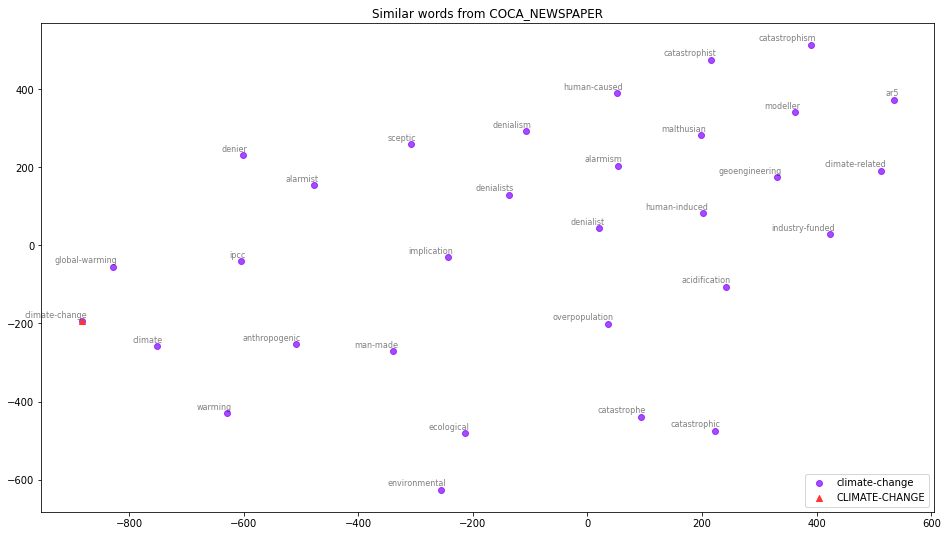

In [ ]:
def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    
    target_coordinates = embedding_clusters[0][-1]
    x_target = target_coordinates[0]
    y_target = target_coordinates[1]
    word_target = word_clusters[0][-1]
    plt.scatter(x_target, y_target, marker = "^", c = "#ff3434", label =word_target.upper(), zorder = 3)
    plt.legend(loc=4)
    plt.title(title)
    #plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words from COCA_NEWSPAPER', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


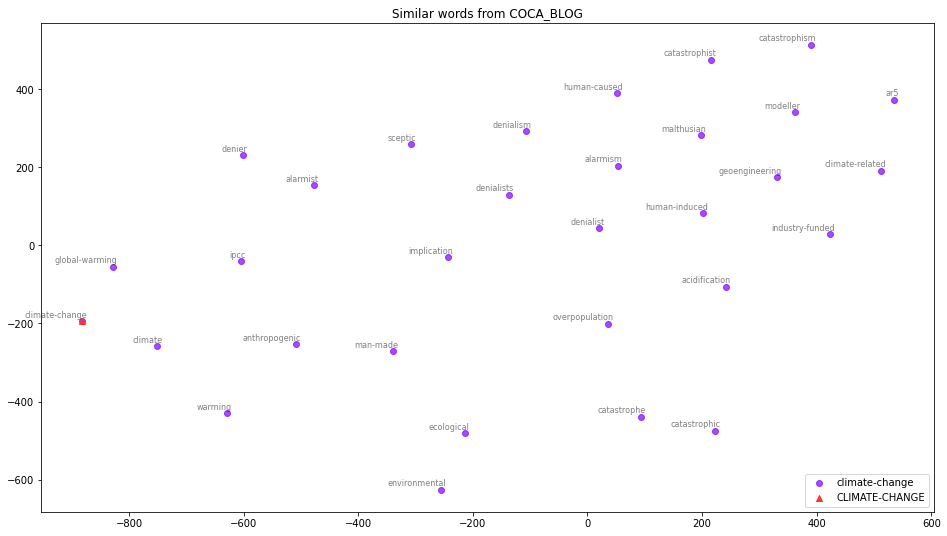

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.cm as cm
% matplotlib inline


def tsne_plot_similar_words(title, labels, embedding_clusters, word_clusters, a, filename=None):
    plt.figure(figsize=(16, 9))
    colors = cm.rainbow(np.linspace(0, 1, len(labels)))
    for label, embeddings, words, color in zip(labels, embedding_clusters, word_clusters, colors):
        x = embeddings[:, 0]
        y = embeddings[:, 1]
        plt.scatter(x, y, c=color, alpha=a, label=label)
        for i, word in enumerate(words):
            plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2),
                         textcoords='offset points', ha='right', va='bottom', size=8)
    
    target_coordinates = embedding_clusters[0][-1]
    x_target = target_coordinates[0]
    y_target = target_coordinates[1]
    word_target = word_clusters[0][-1]
    plt.scatter(x_target, y_target, marker = "^", c = "#ff3434", label =word_target.upper(), zorder = 3)
    plt.legend(loc=4)
    plt.title(title)
    #plt.grid(True)
    if filename:
        plt.savefig(filename, format='png', dpi=150, bbox_inches='tight')
    plt.show()


tsne_plot_similar_words('Similar words from COCA_BLOG', keys, embeddings_en_2d, word_clusters, 0.7,
                        'similar_words.png')